<a href="https://colab.research.google.com/github/atkinsonde/524/blob/main/GEOG_524_correlation_estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo how additional data can be used to improve an estimate space 

We want to develop a estimation space for Station X. In this case, what is the gaussian profile of the mean January Temperature at Station X. 

This can be determined using mean and SD of January T from Station X.

We can improve the estimation space, using information we gain from a nearby station. The linkage between the two stations is based on the Pearson's correlation. 

This also demonstates 3-d plotting.

Data for the example are from Wilks book

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# establish the means and standard deviations for the two stations, and the correlation between them. 
rho=0.95
mu_x=29.87 # Ithica mean Jan T in farenheit
mu_y=31.77 # Canadiagua mean Jan T in farenheit
sig_x=7.71 # Ithica SD Jan T
sig_y=7.86 # Canadiagua SD Jan T

In [31]:
x = y = np.arange(10,50,0.1)
X, Y = np.meshgrid(x, y)

In [16]:
np.ravel(X)

array([10. , 10.1, 10.2, ..., 49.7, 49.8, 49.9])

In [32]:
zs = np.array([ (1/(2*np.pi*sig_x*sig_y*np.sqrt(1-rho**2))
                        * np.exp(-1*(1/(2*(1-rho**2))) 
                        * ( ((x-mu_x)/sig_x)**2 + 
                           ((y-mu_y)/sig_y)**2 - 
                           2*rho*((x-mu_x)/sig_x)*
                           (y-mu_y)/sig_y) ) )   
                            for x,y in zip(np.ravel(X), np.ravel(Y))])


In [33]:
Z = zs.reshape(X.shape)

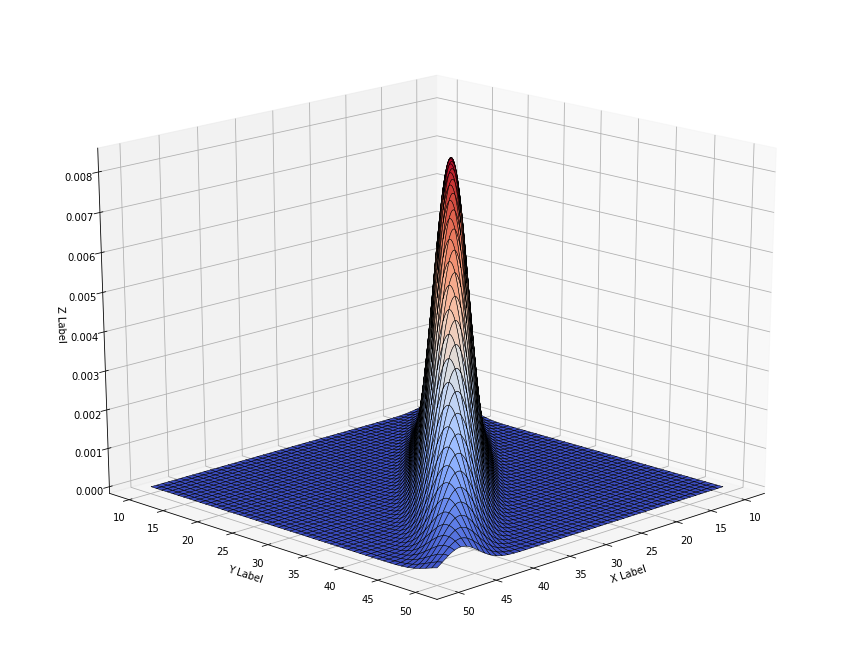

In [34]:
# create the figure space
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# and make the plot
surf=ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,linewidth=.5, antialiased=True, edgecolor='k')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(20,45)
plt.draw()

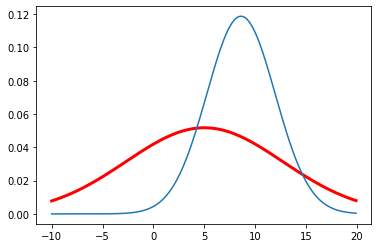

In [41]:
single_y=6
sigma_x = sig_x
sigma_y = sig_y
mu_x = 5
mu_y = 2
x = np.arange(-10,20,0.1)


rho = 0.9

mu_x_given_y = mu_x + rho*sigma_x*( (single_y-mu_y )/sigma_x   )
sigma_x_given_y = sigma_x*np.sqrt(1-rho**2)


y_old = (np.exp((-1*(x-mu_x)**2)/ (2*sigma_x**2)))/(sigma_x*np.sqrt(2*3.14159))	

y_new = (np.exp((-1*(x-mu_x_given_y)**2)/(2*sigma_x_given_y**2)))/(sigma_x_given_y*np.sqrt(2*3.14159))	



plt.plot(x,y_old,linewidth=3, color='r')
plt.plot(x,y_new)
plt.show()